In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
data = pd.read_csv('weather_data.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
            Temperature  Humidity  WindSpeed  Rainfall
Date                                                  
2024-01-01           15        65         12         0
2024-01-02           16        70         10         0
2024-01-03           14        75         15         1
2024-01-04           13        80          8         3
2024-01-05           14        78          7         0


In [47]:
data['Lag_1'] = data['Temperature'].shift(1)
data['Lag_2'] = data['Temperature'].shift(2)

data.dropna(inplace=True)

In [48]:
train_size = int(len(data) * 0.85)
train, test = data.iloc[:train_size], data.iloc[train_size:]
train,test

(            Temperature  Humidity  WindSpeed  Rainfall  Lag_1  Lag_2
 Date                                                                
 2024-01-03           14        75         15         1   16.0   15.0
 2024-01-04           13        80          8         3   14.0   16.0
 2024-01-05           14        78          7         0   13.0   14.0
 2024-01-06           15        72          9         0   14.0   13.0
 2024-01-07           16        68         12         0   15.0   14.0
 ...                 ...       ...        ...       ...    ...    ...
 2024-02-28           15        60         15         0   16.0   17.0
 2024-03-01           16        62         16         0   15.0   16.0
 2024-03-02           17        64         15         0   16.0   15.0
 2024-03-03           18        66         14         1   17.0   16.0
 2024-03-04           17        68         13         2   18.0   17.0
 
 [61 rows x 6 columns],
             Temperature  Humidity  WindSpeed  Rainfall  Lag_1  

In [49]:
X_train = train[['Lag_1', 'Lag_2', 'Humidity', 'WindSpeed', 'Rainfall']]
y_train = train['Temperature']
X_test = test[['Lag_1', 'Lag_2', 'Humidity', 'WindSpeed', 'Rainfall']]
y_test = test['Temperature']
len(y_train),len(y_test)

(61, 11)

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)
y_pred

array([15.57630217, 15.25918247, 14.79165199, 14.68498219, 16.0532206 ,
       16.44572359, 16.89826572, 17.35080785, 16.17803101, 15.92095045,
       15.66386988])

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:\n")
print(f"RMSE (Root Mean Squared Error): {rmse}\n")
print(f"R² (Coefficient of Determination): {r2}")


Model Performance:

RMSE (Root Mean Squared Error): 0.5730629077472557

R² (Coefficient of Determination): 0.7201652630667288


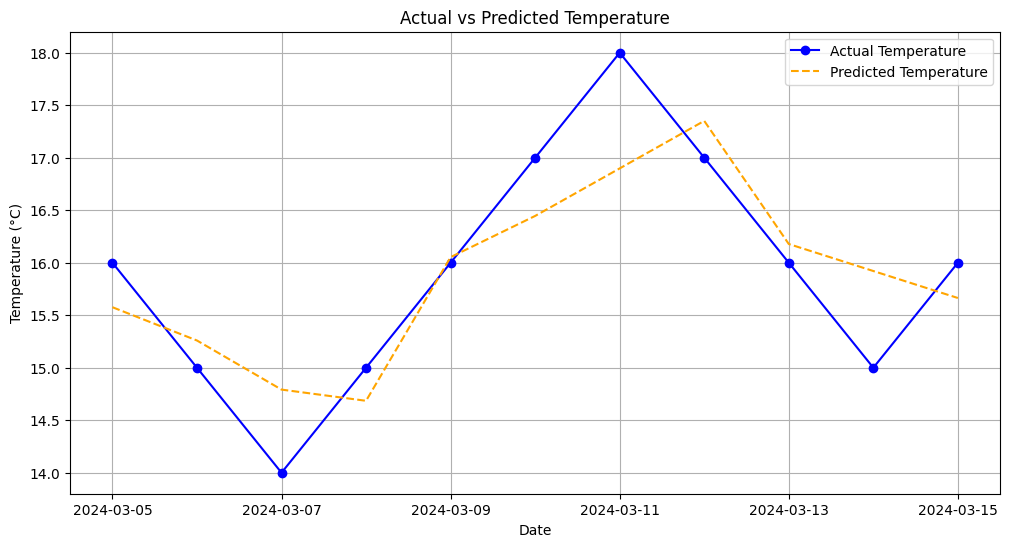

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual Temperature', color='blue', marker='o')
plt.plot(test.index, y_pred, label='Predicted Temperature', color='orange', linestyle='--')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

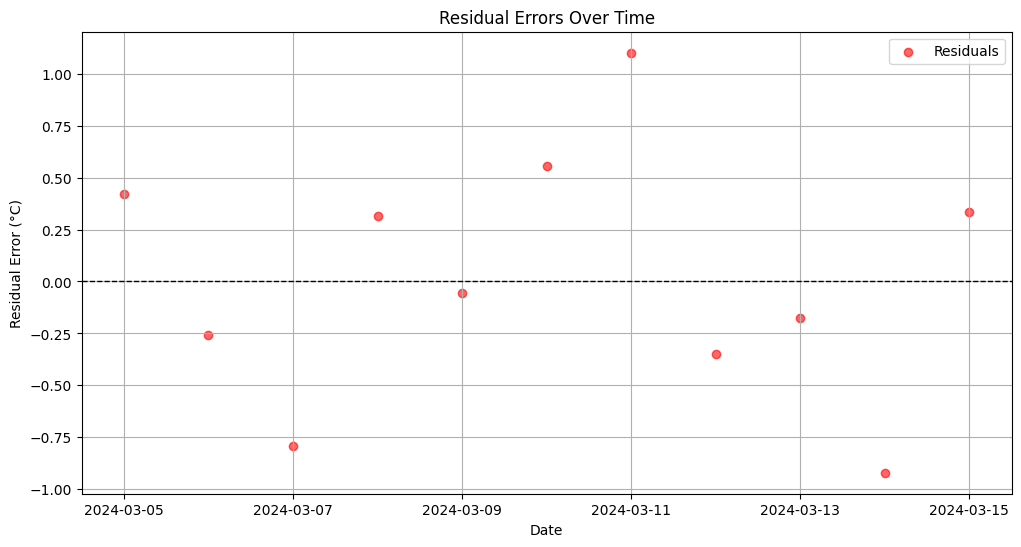

In [54]:
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(test.index, residuals, color='red', alpha=0.6, label='Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Errors Over Time')
plt.xlabel('Date')
plt.ylabel('Residual Error (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
r2 = r2_score(y_test, y_pred)

print(f"R² Score (Accuracy of the model): {r2*100:.2f}")

R² Score (Accuracy of the model): 72.02


In [57]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R²: {cv_scores.mean()*100:.2f}")


Cross-validated R²: 35.04


In [2]:
import joblib

joblib.dump(model, 'trained_model.pkl')


['trained_model.pkl']